# Our Goal: An App for Smoothing Land-Ocean Temperature Data

For this tutorial, we will be developing a small web app that will provide a graphical user interface (GUI) for exploring a dataset that contains global land-ocean temperature data. The data is stored in a CSV file.

We will build the web app using a Jupyter notebook where our workflow will:
- **load a data file** with global temperature data and
- **smooth the data with several algorithms**.
- In the GUI, you should be able to **select a particular range of years** and
- **create a new data file** containing the smoothed data for desired time range.

Before building the web app, let's explore the data and the smoothing algorithms we will use.

In [1]:
# Load the required libraries
import pandas as pd
import os

## Load data from file

In [11]:
# Load data into memory from file
DATA_DIR = 'data'
DATA_FILE = 'land-ocean-temp-index.csv'

df = pd.read_csv(os.path.join(DATA_DIR, DATA_FILE), escapechar='#')
df

,Year,Temperature
0,1880,-0.15
1,1881,-0.07
2,1882,-0.09
3,1883,-0.16
4,1884,-0.27
...,...,...
135,2015,0.90
136,2016,1.02
137,2017,0.93
138,2018,0.86


## Plot original data

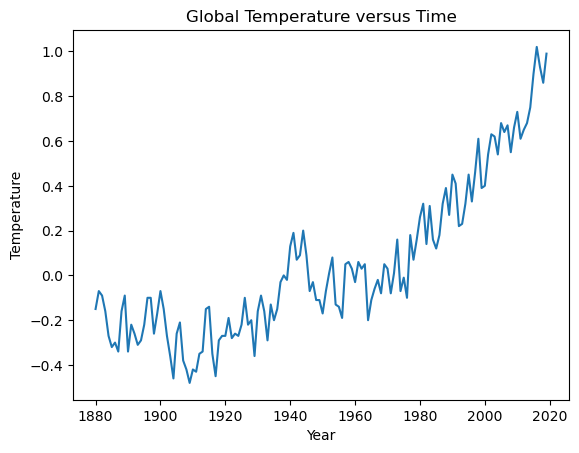

In [12]:
from matplotlib import pyplot as plt

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Global Temperature versus Time')
plt.plot(df['Year'], df['Temperature'], label='Raw Data')
plt.show()

## Add column for Savitzky-Golay filter

Let's implement the [Savitzky-Golay filter](https://en.wikipedia.org/wiki/Savitzky–Golay_filter) and add a new column to the data frame with the smoothed data.  This filter is a type of low-pass filter that can be used for smoothing noisy data. The "moving average" filter common in financial data analysis is a special case of the Savitzky-Golay filter with polynomial order 1.

In [13]:
from scipy.signal import savgol_filter

# Set the window size and polynomial order for the Savitzky-Golay filter
window_size = 7
poly_order = 5

moving_avg_col = f'Moving_Average_{window_size}'
SG_col = f'Savitzky_Golay{poly_order}_{window_size}'

# Apply Savitzky-Golay smoothing to the Temperature column
df[moving_avg_col] = savgol_filter(df['Temperature'], window_size, 1)
df[SG_col] = savgol_filter(df['Temperature'], window_size, poly_order)
df

,Year,Temperature,Moving_Average_7,Savitzky_Golay5_7
0,1880,-0.15,-0.073214,-0.149665
1,1881,-0.07,-0.113571,-0.072013
2,1882,-0.09,-0.153929,-0.084968
3,1883,-0.16,-0.194286,-0.166710
4,1884,-0.27,-0.221429,-0.267186
...,...,...,...,...
135,2015,0.90,0.827143,0.908658
136,2016,1.02,0.875714,0.999654
137,2017,0.93,0.917857,0.945260
138,2018,0.86,0.960000,0.853896


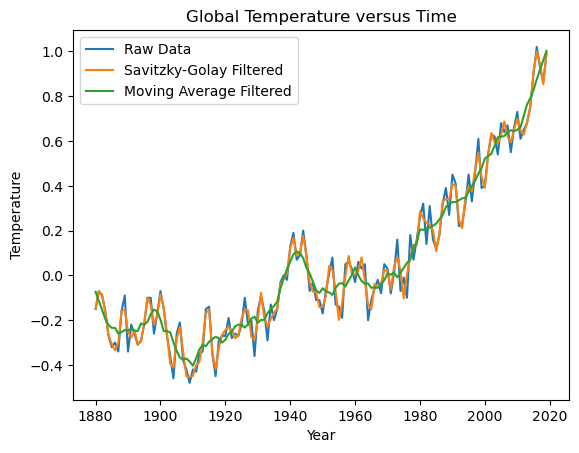

In [15]:
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Global Temperature versus Time')
plt.plot(df['Year'], df['Temperature'], label='Raw Data')
plt.plot(df['Year'], df[SG_col], label='Savitzky-Golay Filtered')
plt.plot(df['Year'], df[moving_avg_col], label='Moving Average Filtered')
plt.legend()
plt.show()

## Select a range of data

In [18]:
# Create a new pandas DataFrame containing only the selected range of years
from_year = 1920
to_year = 1980
subset_df = df[(df['Year'] >= from_year) & (df['Year'] <= to_year)]
subset_df

,Year,Temperature,Moving_Average_7,Savitzky_Golay5_7
40,1920,-0.27,-0.287143,-0.243810
41,1921,-0.19,-0.261429,-0.229610
42,1922,-0.28,-0.251429,-0.245368
43,1923,-0.26,-0.227143,-0.280779
44,1924,-0.27,-0.220000,-0.268485
...,...,...,...,...
96,1976,-0.10,0.055714,0.005411
97,1977,0.18,0.070000,0.076970
98,1978,0.07,0.125714,0.136017
99,1979,0.16,0.147143,0.133810


## Plot selected data with smoothed curve

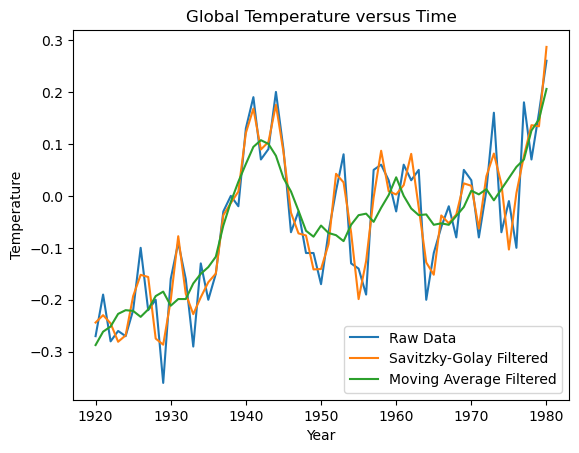

In [19]:
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Global Temperature versus Time')
plt.plot(subset_df['Year'], subset_df['Temperature'], label='Raw Data')
plt.plot(subset_df['Year'], subset_df[SG_col], label='Savitzky-Golay Filtered')
plt.plot(subset_df['Year'], subset_df[moving_avg_col], label='Moving Average Filtered')
plt.legend()
plt.show()

## Save selected data to file

In [20]:
# Save the subset DataFrame to a new CSV file
OUTPUT_FILE = 'output.csv'

subset_df.to_csv(os.path.join(DATA_DIR, OUTPUT_FILE), index=False)